In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris

In [30]:
sns.set()

##### loading the necessary dataset that is iris

In [4]:
iris= load_iris()

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

##### converting the dataset into a pandas dataframe

In [6]:
df= pd.DataFrame(iris.data, columns= iris.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df["target"]= iris.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

##### here above we can see that the target with the mapping of 0 is setosa, 1 is versicolor and 2 is virginica

##### checking for any nan values and the shape of the dataset

In [11]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [12]:
df.shape

(150, 5)

##### so there are no null values in the data and we have 150 records of the data along with 5 columns

##### data visualizations

In [37]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### checking the distribution of the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025392648C10>,
      dtype=object)

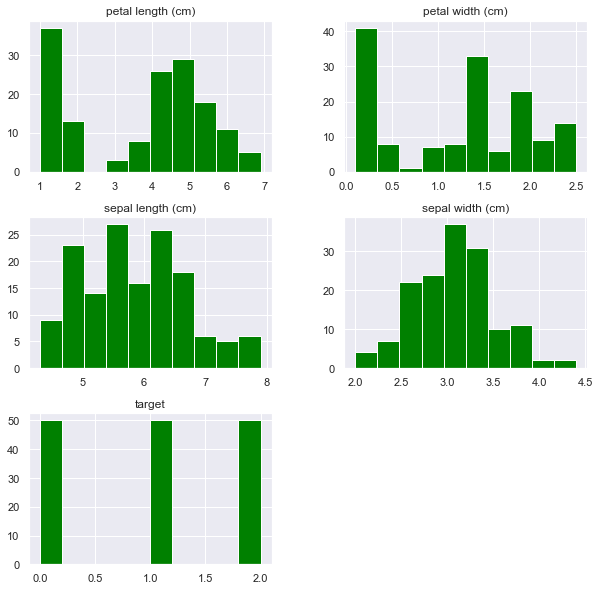

In [48]:
df.hist(figsize=(10,10), color="green")

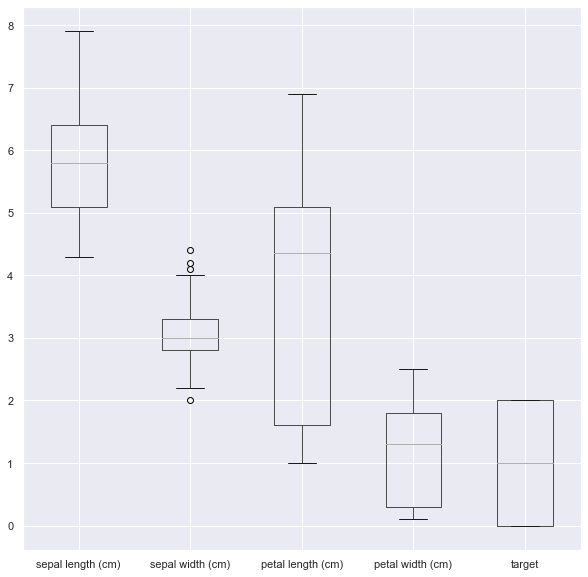

In [39]:
df.boxplot(figsize=(10,10))

In [40]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##### here by looking at the box plot, statistics and distribution we can clearly say that sepal width (cm) contains a few outliers that needs to be removed so as to form proper clusters in the data

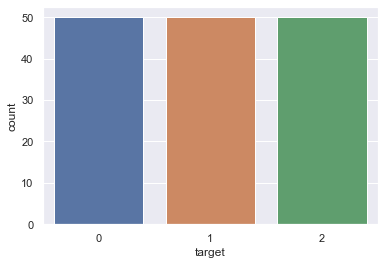

In [41]:
sns.countplot(x="target", data=df)

In [50]:
df.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

##### the targets are equal in number that is the data is symmetrical

In [42]:
df0= df[df["target"]==0]
df1= df[df["target"]==1]
df2= df[df["target"]==2]

Text(0, 0.5, 'sepal width (cm)')

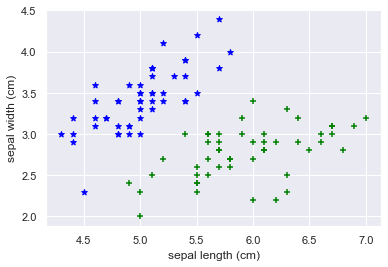

In [43]:
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], marker="*",color="blue")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], marker="+",color="green")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

Text(0, 0.5, 'petal width (cm)')

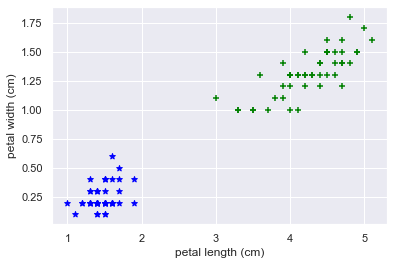

In [44]:
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], marker="*",color="blue")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], marker="+",color="green")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

###### here we can see that the features are very well separated from each other and therefore targets can easily be recognized

##### let's plot a pairplot to see the linkage of one variable with another with respect to target

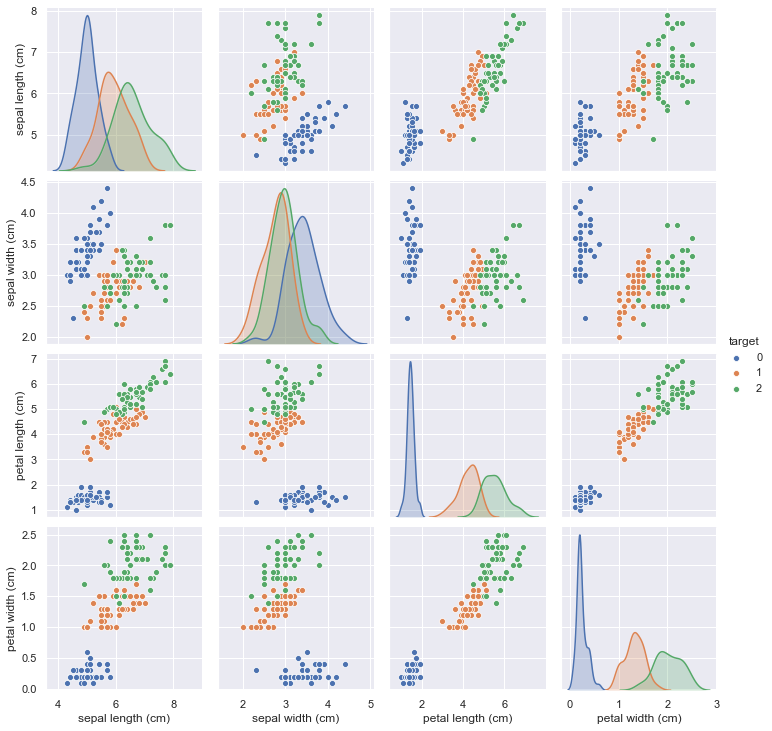

In [49]:
sns.pairplot(df, hue="target")

###### removing outliers using interquantile range

In [51]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
target               2.0
dtype: float64


In [54]:
df.shape

(150, 5)

In [53]:
df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_new.shape

(146, 5)

##### here we have successfully removed 4 outliers from our data and thus the new shape of the data is (146,5)

##### using K means clustering unsupervised machine learning to form clusters as per the elbow technique and dropping the sepal width and length columns as per the question provided to us

In [57]:
df_new.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
df_new= df_new.drop(["sepal length (cm)","sepal width (cm)"], axis=1)

In [63]:
k_rng= range(1,15)
sse=[]#------------------------> creating an empty list of sse and will append the same with values after the execution of for loop
for k in k_rng:
  km= KMeans(n_clusters=k)
  km.fit(df_new[["petal length (cm)", "petal width (cm)"]])
  sse.append(km.inertia_)#----------> this inertia method helps in performing the sum of square errors and helps in getting a better understanding of k


In [64]:
sse

[531.7715068493153,
 83.81036564625849,
 30.58741242385631,
 19.20917834647622,
 13.718015509313382,
 10.8826701075332,
 9.262032139741777,
 7.688196612523894,
 6.39019869540833,
 5.528728495857652,
 5.072491667830377,
 4.571661244395664,
 4.228016265135832,
 3.7435975798921715]

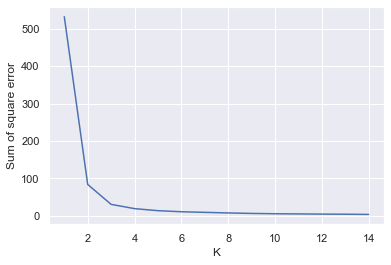

In [65]:
plt.xlabel("K")
plt.ylabel("Sum of square error")
plt.plot(k_rng,sse)

##### as per the elbow rule the k value to be chosen is 2

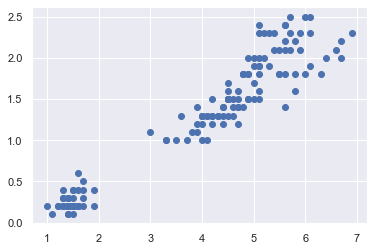

In [69]:
plt.scatter(df_new["petal length (cm)"], df_new["petal width (cm)"])

##### as per the graph also the no. of clusters to be formed is 2

In [66]:
km= KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [67]:
y_predict= km.fit_predict(df_new[["petal length (cm)","petal width (cm)"]])
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [70]:
df_new["cluster"]= y_predict
df_new

,petal length (cm),petal width (cm),target,cluster
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0
...,...,...,...,...
145,5.2,2.3,2,1
146,5.0,1.9,2,1
147,5.2,2.0,2,1
148,5.4,2.3,2,1


##### from above we can see that if we choose petal length and petal width to form clusters then the predicted flower names are only setosa 0 and versicolor 1. There is no virginica if we take K means clustering into consideration with petal length and petal width.